# Coulomb Stopping Powers in a WD 

In [1]:
# %matplotlib nbagg
%matplotlib inline

import time 

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,20]

import stoppingpower as sp

In [2]:
def momentum_threshold(p_target, M_incident):
    """ The minimum incident momentum at which the low-energy PR estimate is valid """
    return (p_target**2)/(2*M_incident)

In [3]:
Z_carbon = 6.0
A_carbon = 12.0
n_elec = Z_carbon*(10.0**np.array([30.0, 31.0, 32.0])) # cm^{-3}
m_proton = 940.0 # MeV
m_electron = 0.5 # Mev
m_pion = 140.0 # MeV

In [4]:
incidents = ["carbon", "pion", "proton", "electron"]
masses = {"carbon":A_carbon*m_proton, "pion":m_pion, "proton":m_proton, "electron":m_electron}
charges = {"carbon":Z_carbon, "pion":1.0, "proton":1.0, "electron":1.0}
samples = 10**6

density: 6e+30 cm^(-3)
    calculating carbon stopping power...
    .... finished in 47.782 minutes
    calculating pion stopping power...
    .... finished in 54.241 minutes
    calculating proton stopping power...
    .... finished in 51.966 minutes
    calculating electron stopping power...
    .... finished in 56.058 minutes
density: 6e+31 cm^(-3)
    calculating carbon stopping power...
    .... finished in 48.760 minutes
    calculating pion stopping power...
    .... finished in 54.118 minutes
    calculating proton stopping power...
    .... finished in 52.227 minutes
    calculating electron stopping power...
    .... finished in 55.145 minutes
density: 6e+32 cm^(-3)
    calculating carbon stopping power...
    .... finished in 48.604 minutes
    calculating pion stopping power...
    .... finished in 53.097 minutes
    calculating proton stopping power...
    .... finished in 51.505 minutes
    calculating electron stopping power...
    .... finished in 52.844 minutes


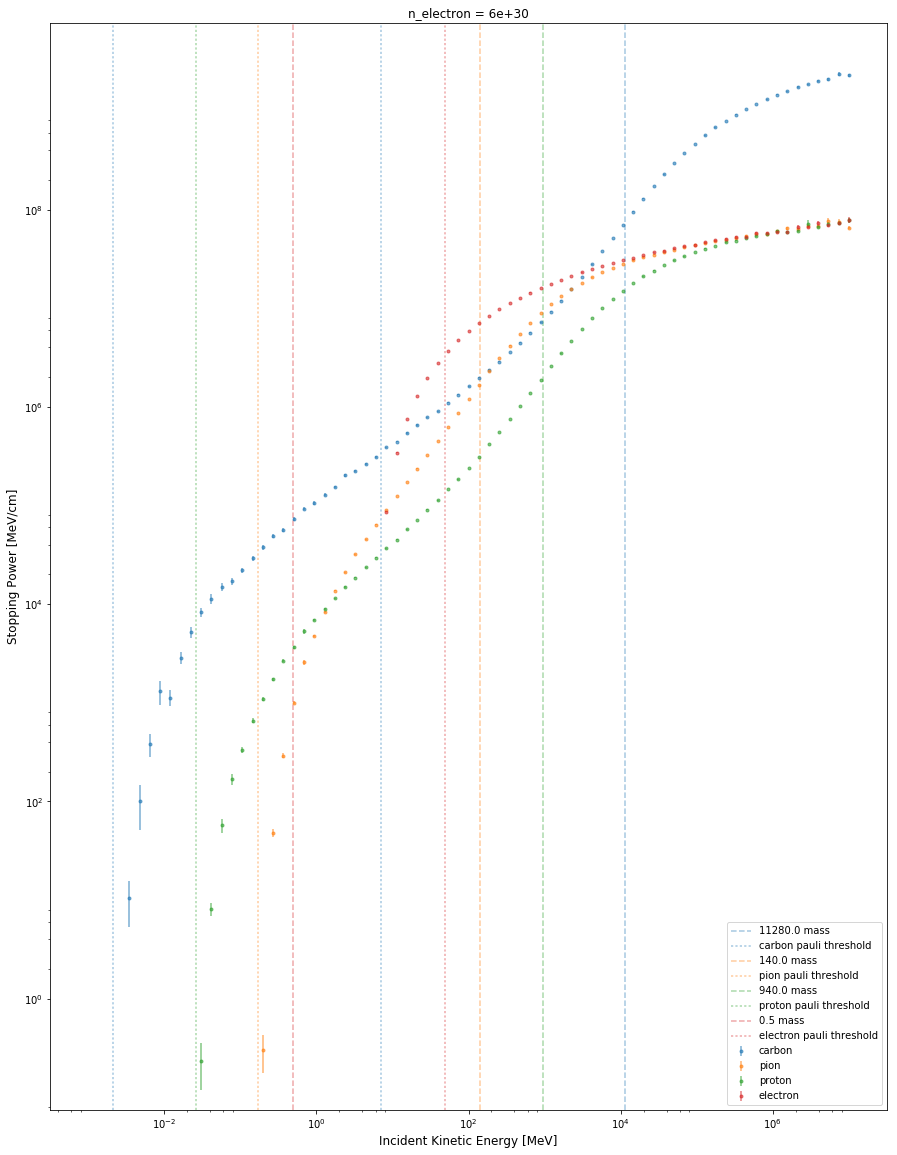

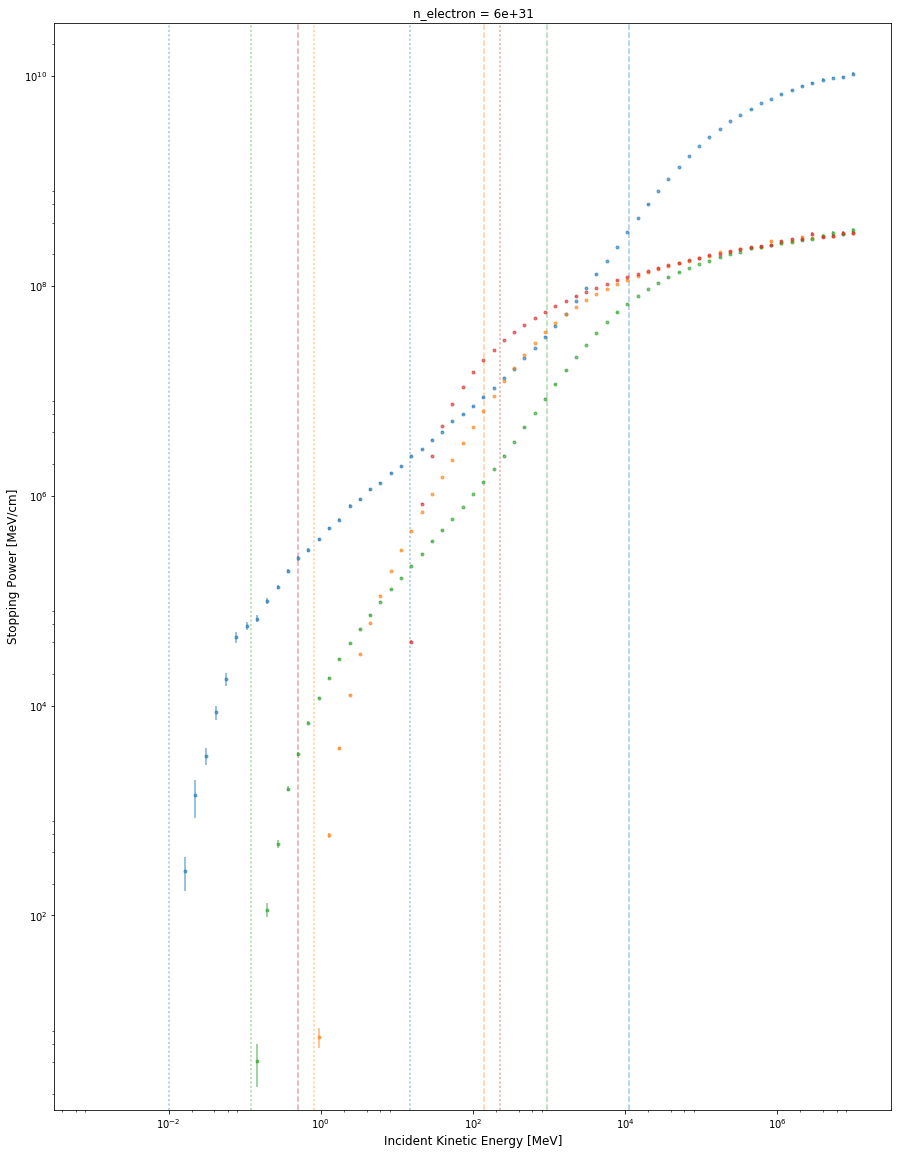

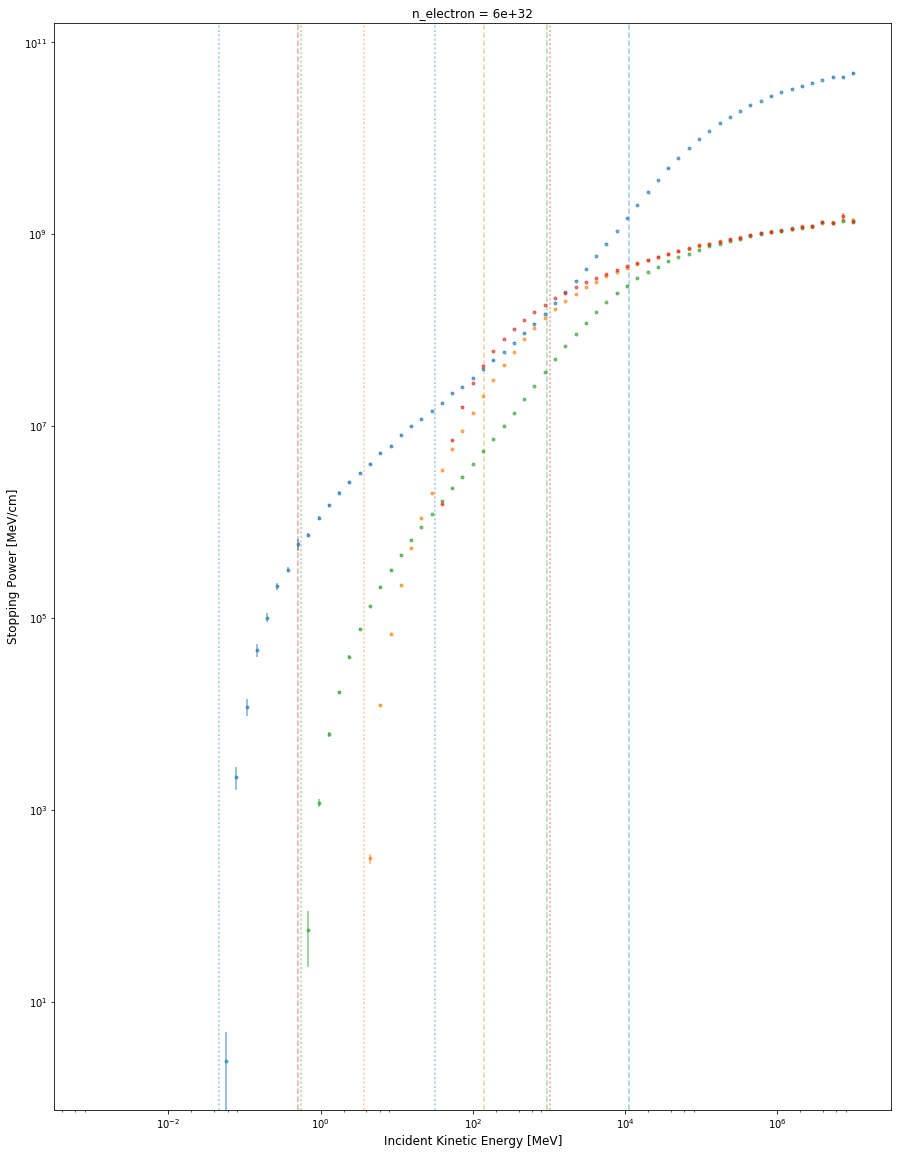

In [6]:
ke = np.logspace(-3, 7, 75)  # 100 samples log-spaced between 10^-4 and 10^9
for n_index, n0 in enumerate(n_elec):
    print "density: {} cm^(-3)".format(n0)
    wd = sp.FermiSea_StoppingPower(m=m_electron, n0=n0, 
                                   masstolength=sp.MeV_to_InvCM)
    fig, ax = plt.subplots()
    for incident in incidents:
        dedx_func = wd.get_ion_coulomb_stopping_power(masses[incident], charges[incident])
        print "    calculating {} stopping power...".format(incident)
        t0 = time.time()
        dedx, dedx_error = dedx_func(ke, important=True, samples=samples)
        elapsed = (time.time() - t0)/60.0
        print "    .... finished in {:.3f} minutes".format(elapsed)
        dedx_plot = ax.errorbar(ke, dedx, yerr=dedx_error, alpha=0.6, marker='.', 
                                linestyle='', label=incident)
        current_color = dedx_plot[0].get_color()
        ax.axvline(masses[incident], linestyle='--', color=current_color, 
                   alpha=0.4, label="{} mass".format(masses[incident]))
        ax.axvline(momentum_threshold(wd.pfermi, masses[incident]), linestyle=':', alpha=0.4,
                   color=current_color, label="{} pauli threshold".format(incident))
    if n_index == 0:
        ax.set_title("WD Coulomb Stopping Powers; n_electron = {}".format(n0), fontsize=12)
        ax.legend(loc="best")
    ax.axvline(wd.Efermi, linestyle=':', alpha=0.4, label="fermi energy")
    ax.set_title("n_electron = {}".format(n0), fontsize=12)
    ax.set_xlabel("Incident Kinetic Energy [MeV]", fontsize=12)
    ax.set_ylabel("Stopping Power [MeV/cm]", fontsize=12)
    ax.set_xscale("log")
    ax.set_yscale("log")